In [1]:
using Gadfly

### 共轭梯度法

In [2]:
norm(x) = sqrt(x'*x)

norm (generic function with 1 method)

In [3]:
function search_for_alpha(f, xk, fk, d, g; α0=100, ϵ=0.5, τ=0.5)
    α = α0
    ϕ0= d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [4]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [5]:
xn, fn, gn,step1=
ConjugateGradientFSO(
    (x1,x2)->x1^2+8x2^2+3x1*x2-x1-12x2,
    (x1,x2)->[2x1+3x2-1; 16x2+3x1-12],
    [2 3;3 16],
    [1.,1.],
    debug=true
) ##homework test

i=1 x=[0.735772, 0.537602] α=0.6581939799331105 β=0.08866353526340147 gn=[2.08435, -1.19106] d=[-2.439, 0.570412] δ= [-1.60534, 0.375442]
Convergence is reached after 2 iterations.


([-0.869565, 0.913043], -5.0434782608695645, [-4.44089e-16, 0.0], Any[[1.0, 1.0], [0.735772, 0.537602], [-0.869565, 0.913043]])

In [6]:
step1##共轭法迭代的点

3-element Array{Any,1}:
 [1.0, 1.0]           
 [0.735772, 0.537602] 
 [-0.869565, 0.913043]

### 最速下降

In [7]:
function search_for_alpha(f, xk, fk, d, g; α0=100, ϵ=0.5, τ=0.5)  ##最速下降
    α = α0
    ϕ0= d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [8]:
function steepest_descent(f, g, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=1000,
        debug=true) 
    
    array=[]
    xk = x0
    fk = f(xk...)
    for i in 1:maxIterations
        # iteration
        d =-g(xk...)
        α = search_for_alpha(f, xk, fk, d, -d)
        δ = α*d
        xn = xk .+ δ
        fn = f(xn...)
        # convegence?
        array=push!(array,xk)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.","\n array",array)
            return xk, fk, d, δ,array
        end
          
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
      
        xk = xn
        fk = fn

        
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
    
end

steepest_descent (generic function with 1 method)

In [9]:
point,value,dic,g,step2=
steepest_descent((x1,x2)->x1^2+8x2^2+3x1*x2-x1-12x2,
                 (x1,x2)->[2x1+3x2-1; 16x2+3x1-12],
                 [1.,1.]
    )

i=1 α=0.048828125 xk=[1.0, 1.0] d=[-4.0, -7.0] δ= [-0.195313, -0.341797]
i=2 α=0.09765625 xk=[0.804688, 0.658203] d=[-2.58398, -0.945313] δ= [-0.252342, -0.0923157]
i=3 α=0.1953125 xk=[0.552345, 0.565887] d=[-1.80235, 1.28876] δ= [-0.352022, 0.251712]
i=4 α=0.048828125 xk=[0.200323, 0.817599] d=[-1.85344, -1.68256] δ= [-0.0905002, -0.0821562]
i=5 α=0.390625 xk=[0.109823, 0.735443] d=[-1.42598, -0.0965592] δ= [-0.557022, -0.0377184]
i=6 α=0.048828125 xk=[-0.447199, 0.697725] d=[-0.198777, 2.178] δ= [-0.0097059, 0.106348]
i=7 α=0.09765625 xk=[-0.456905, 0.804072] d=[-0.498408, 0.505555] δ= [-0.0486727, 0.0493706]
i=8 α=0.1953125 xk=[-0.505577, 0.853443] d=[-0.549175, -0.138357] δ= [-0.107261, -0.0270228]
i=9 α=0.048828125 xk=[-0.612838, 0.82642] d=[-0.253585, 0.61579] δ= [-0.0123821, 0.0300679]
i=10 α=0.1953125 xk=[-0.62522, 0.856488] d=[-0.319024, 0.17185] δ= [-0.0623094, 0.0335645]
i=11 α=0.09765625 xk=[-0.687529, 0.890053] d=[-0.295099, -0.178254] δ= [-0.0288183, -0.0174076]
i=12 α=0.

([-0.864922, 0.911972], -5.043462444495812, [-0.00607173, 0.00321303], [-0.00118588, 0.000627545], Any[[1.0, 1.0], [0.804688, 0.658203], [0.552345, 0.565887], [0.200323, 0.817599], [0.109823, 0.735443], [-0.447199, 0.697725], [-0.456905, 0.804072], [-0.505577, 0.853443], [-0.612838, 0.82642], [-0.62522, 0.856488]  …  [-0.844479, 0.909849], [-0.848443, 0.907491], [-0.850942, 0.909979], [-0.856421, 0.908644], [-0.85706, 0.910156], [-0.860253, 0.911853], [-0.861723, 0.910985], [-0.862651, 0.911904], [-0.864684, 0.911414], [-0.864922, 0.911972]])

In [11]:
step2##最速下降法迭代的点

30-element Array{Any,1}:
 [1.0, 1.0]           
 [0.804688, 0.658203] 
 [0.552345, 0.565887] 
 [0.200323, 0.817599] 
 [0.109823, 0.735443] 
 [-0.447199, 0.697725]
 [-0.456905, 0.804072]
 [-0.505577, 0.853443]
 [-0.612838, 0.82642] 
 [-0.62522, 0.856488] 
 [-0.687529, 0.890053]
 [-0.716348, 0.872645]
 [-0.734437, 0.89088] 
 ⋮                    
 [-0.834167, 0.901164]
 [-0.835883, 0.90526] 
 [-0.844479, 0.909849]
 [-0.848443, 0.907491]
 [-0.850942, 0.909979]
 [-0.856421, 0.908644]
 [-0.85706, 0.910156] 
 [-0.860253, 0.911853]
 [-0.861723, 0.910985]
 [-0.862651, 0.911904]
 [-0.864684, 0.911414]
 [-0.864922, 0.911972]

### 牛顿法

In [12]:
function Newton(f, g, h, x0;
        ϵx=0.01,ϵf=0.01,ϵg=0.01,maxtimes=128,debug=true)##多维中的牛顿法
    ep=[]
    xk=x0
    fk=f(xk...)
    for i in 1:maxtimes
        d=-inv(h(xk...))*g(xk...)
        α=1
        δ=α*d
        xn=xk.+δ
        fn=f(xn...)
        ep=push!(ep,xk)
        if(norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("convergence is reached after ",i," interations"," \n ep",ep)
            return xk,fk,d,δ,ep
        end
        if debug
            println("i=",i," xk=",xk," d=",d," δ=",δ)
        end
        xk=xn
        fk=fn
    end
  println("warn: ",maxtimes,"interations have been exceeded")
end

Newton (generic function with 1 method)

In [13]:
xk,fk,d,g,step3=
Newton(
    (x1,x2)->x1^2+8x2^2+3x1*x2-x1-12x2,
    (x1,x2)->[2x1+3x2-1; 16x2+3x1-12],
    (x1,x2)->[2 3;3 16],
    [1.,1.],
    maxtimes=1000000,
    debug=true
)

i=1 xk=[1.0, 1.0] d=[-1.86957, -0.0869565] δ=[-1.86957, -0.0869565]
convergence is reached after 2 interations 
 epAny[[1.0, 1.0], [-0.869565, 0.913043]]


([-0.869565, 0.913043], -5.0434782608695645, [3.08932e-16, -5.79247e-17], [3.08932e-16, -5.79247e-17], Any[[1.0, 1.0], [-0.869565, 0.913043]])

In [19]:
step3##牛顿法迭代的点

2-element Array{Any,1}:
 [1.0, 1.0]           
 [-0.869565, 0.913043]

### print

In [15]:
fun=layer((x,y)->x^2+8y^2+3x*y-x-12y, -1.5, 1.5, -0.5, 1.5); ##把x1，x2换成对应的x，y
conjugate=layer(
    x=[step1[i][1] for i in 1:length(step1)],
    y=[step1[i][2] for i in 1:length(step1)],
    label=[string(step1[i]) for i in 1:length(step1)],
    Geom.point, Geom.line, Geom.label,Theme(default_color="red"));

In [21]:
steepest=layer(
    x=[step2[i][1] for i in 1:length(step2)],
    y=[step2[i][2] for i in 1:length(step2)],
    label=[string(step2[i]) for i in 1:length(step2)],
    Geom.point, Geom.line, Geom.label,Theme(default_color="dimgrey"));

In [17]:
New=layer(
    x=[step3[i][1] for i in 1:length(step3)],
    y=[step3[i][2] for i in 1:length(step3)],
    label=[string(step3[i]) for i in 1:length(step3)],
    Geom.point, Geom.line, Geom.label,Theme(default_color="green"));

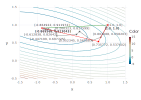

In [22]:
plot(fun,conjugate,steepest,New) ##red is Conjuate，grey is steepest，green is Newton